In [ ]:
#IMPOTANT NOTE - If you click run all it doesn't work sometimes, why? I have no idea. It will work if you load every cell individually

In [48]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'ECON DA'
os.chdir(drive_path + project_folder)

In [50]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from google.colab import files

In [7]:
# Import Voter Turnout Data

In [51]:
# All cleaning required for Voter turnout data in following cells
voter_data = pd.read_csv('voter_turnout.txt', sep="\t")
voter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35278 entries, 0 to 35277
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   STCOFIPS10             35278 non-null  int64 
 1   YEAR                   35278 non-null  int64 
 2   REG_VOTERS             35278 non-null  object
 3   BALLOTS_CAST           35278 non-null  object
 4   CVAP                   35278 non-null  object
 5   REG_VOTERS_PCT         35278 non-null  object
 6   VOTER_TURNOUT_PCT      35278 non-null  object
 7   REG_VOTER_TURNOUT_PCT  35278 non-null  object
 8   PRES_DEM_VOTES         35278 non-null  object
 9   PRES_REP_VOTES         35278 non-null  object
 10  SEN_DEM_VOTES          35278 non-null  object
 11  SEN_REP_VOTES          35278 non-null  object
 12  PRES_DEM_RATIO         35278 non-null  object
 13  PRES_REP_RATIO         35278 non-null  object
 14  SEN_DEM_RATIO          35278 non-null  object
 15  SEN_REP_RATIO      

In [52]:
# Keep only presedential years
pres_years = [2000, 2004, 2008, 2012, 2016, 2020]
voter_data = voter_data[voter_data["YEAR"].isin(pres_years)]

In [53]:
# Change wrong/impossible data(counties with 0 ballots)
cols = ["BALLOTS_CAST", "VOTER_TURNOUT_PCT", "REG_VOTER_TURNOUT_PCT"]
voter_data[cols] = voter_data[cols].replace(0, np.nan)

In [54]:
# Drop unneeded turnout measures, as well as other misc. columns
voter_data = voter_data.drop(columns=["PRES_DEM_VOTES","PRES_REP_VOTES","SEN_DEM_VOTES","SEN_REP_VOTES","PRES_DEM_RATIO","PRES_REP_RATIO","SEN_DEM_RATIO","SEN_REP_RATIO","PARTISAN_INDEX_DEM","PARTISAN_INDEX_REP","CVAP","REG_VOTERS_PCT","REG_VOTER_TURNOUT_PCT"])

In [55]:
# Strip Hidden white space - AI generated code
voter_data = voter_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-3465459781.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voter_data = voter_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [56]:
# Convert columns to Numeric - Also AI generated
id_vars = ["STCOFIPS10", "COUNTY", "ST", "STATE"]
for col in voter_data.columns:
    if col not in id_vars:
        voter_data[col] = pd.to_numeric(voter_data[col], errors="coerce")

In [57]:
# Create % change columns
voter_data = voter_data.sort_values(["STCOFIPS10", "YEAR"])
voter_data["pct_change_turnout"] = (voter_data.groupby("STCOFIPS10")["VOTER_TURNOUT_PCT"].pct_change())

/tmp/ipython-input-1983360488.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  voter_data["pct_change_turnout"] = (voter_data.groupby("STCOFIPS10")["VOTER_TURNOUT_PCT"].pct_change())


In [58]:
# Drop Nan values in Voter turnout pct
voter_data = voter_data.dropna(subset=["VOTER_TURNOUT_PCT"])

In [59]:
# Drop nan values in pct_change column - First line is AI generated
voter_data = voter_data.replace([np.inf, -np.inf], np.nan)
voter_data = voter_data.dropna(subset=["pct_change_turnout"])

In [60]:
# Make FIPS code an int so it can be mereged
voter_data["STCOFIPS10"] = (voter_data["STCOFIPS10"].astype(str).str.zfill(5))

In [61]:
voter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11864 entries, 4 to 35274
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STCOFIPS10          11864 non-null  object 
 1   YEAR                11864 non-null  int64  
 2   REG_VOTERS          11864 non-null  float64
 3   BALLOTS_CAST        11864 non-null  float64
 4   VOTER_TURNOUT_PCT   11864 non-null  float64
 5   pct_change_turnout  11864 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 648.8+ KB


In [62]:
# Upload GDP data - Used AI for latin1 part
gdp_data = pd.read_csv("final_gdp.csv", encoding="latin1")

/tmp/ipython-input-1633544355.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp_data = pd.read_csv("final_gdp.csv", encoding="latin1")


In [63]:
# Only keep GDP info for "ALL industries"
gdp_data = gdp_data[gdp_data["Description"] == "All industry total "]

In [64]:
# Drop Unneccesary columns
gdp_data = gdp_data.drop(columns=['GeoName','Region','TableName','LineCode','IndustryClassification','Description','Unit'])

In [65]:
# Switch format(wide to long)
gdp_data = gdp_data.melt(id_vars=["GeoFIPS"], var_name="YEAR", value_name="GDP")

In [66]:
# Switch vari typrs
gdp_data["YEAR"] = pd.to_numeric(gdp_data["YEAR"], errors="coerce")
gdp_data["GDP"] = pd.to_numeric(gdp_data["GDP"], errors="coerce")

In [67]:
# Keep only presedential year daata
gdp_data = gdp_data[gdp_data["YEAR"].isin(pres_years)]

In [68]:
# Compute % chnage for the years
gdp_data["pct_change_gdp"] = (gdp_data.groupby("GeoFIPS")["GDP"].pct_change())

/tmp/ipython-input-557636392.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gdp_data["pct_change_gdp"] = (gdp_data.groupby("GeoFIPS")["GDP"].pct_change())


In [69]:
# Drop na values from pct change
gdp_data = gdp_data.dropna(subset=["pct_change_gdp"])

In [70]:
# Match the FIPS column name with voter turnout name/ used AI to solve diff data type merging issue
gdp_data = gdp_data.rename(columns={"GeoFIPS": "STCOFIPS10"})
gdp_data["STCOFIPS10"] = (gdp_data["STCOFIPS10"].astype(str).str.zfill(5))

In [71]:
# Get it to only columns needed, rid of GDP
gdp_data = gdp_data.drop(columns=["GDP"])

In [72]:
# Remove the "" from my FIPS so I can merge it - AI generated
gdp_data["STCOFIPS10"] = (gdp_data["STCOFIPS10"].astype(str).str.replace('"', '', regex=False).str.replace("'", '', regex=False).str.strip().str.zfill(5))

In [73]:
# keep only county data by removing state level FIPS
gdp_data = gdp_data[~gdp_data["STCOFIPS10"].str.endswith("000")]


In [74]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12456 entries, 22248 to 63551
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STCOFIPS10      12456 non-null  object 
 1   YEAR            12456 non-null  int64  
 2   pct_change_gdp  12456 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 389.2+ KB


In [75]:
# Merge the two datasets
final_data = voter_data.merge(gdp_data, on=["STCOFIPS10", "YEAR"], how="inner")

In [76]:
# Add predictor varibales - Unemployment
unemployment_data = pd.read_csv("Unemployment2023.csv")
unemployment_data.head(20)

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0
5,0,US,United States,Employed_2001,136977996.0
6,0,US,United States,Unemployed_2001,6808541.0
7,0,US,United States,Unemployment_rate_2001,4.7
8,0,US,United States,Civilian_labor_force_2002,144839298.0
9,0,US,United States,Employed_2002,136455783.0


In [77]:
# Clear out non-county rows
unemployment_data = unemployment_data[unemployment_data["FIPS_Code"]!= 0]

In [78]:
# Extract Year from attriubte coumn - AI generated code
unemployment_data["Year"] = unemployment_data["Attribute"].str.extract(r"(\d{4})").astype(int)

In [79]:
# Extract just the varianle name so I can keep only Unemployment rate - AI generated
unemployment_data["variable"] = unemployment_data["Attribute"].str.extract(r'([A-Za-z_]+)_\d{4}')


In [80]:
# Just keep unemployment rate
unemployment_data = unemployment_data[unemployment_data["Attribute"].str.contains("Unemployment_rate")]

In [81]:
# Standardize FIPS same as for GDp/Voter data
unemployment_data["STCOFIPS10"] = (unemployment_data["FIPS_Code"].astype(int).astype(str).str.zfill(5))

In [82]:
# match year column name so it can merge
unemployment_data = unemployment_data.rename(columns={"Year": "YEAR"})

In [83]:
# keep neeeded columsn
unemployment_data = unemployment_data[["STCOFIPS10", "YEAR", "Value"]].rename(columns={"Value": "unemployment_rate"})


In [84]:
final_data = final_data.merge(unemployment_data, on=["STCOFIPS10", "YEAR"], how="inner")

In [42]:
# Clean out final unneccesary columns
#final_data = final_data.drop(columns=["unemployment_rate_x", "unemployment_rate_y", "FIPS_Code","State"])
# rename value column to unemployment rate
final_data = final_data.rename(columns={"Value": "unemployment_rate"})

In [43]:
# Save final data as a csv
final_data = final_data.to_csv("final_data.csv", index=False)


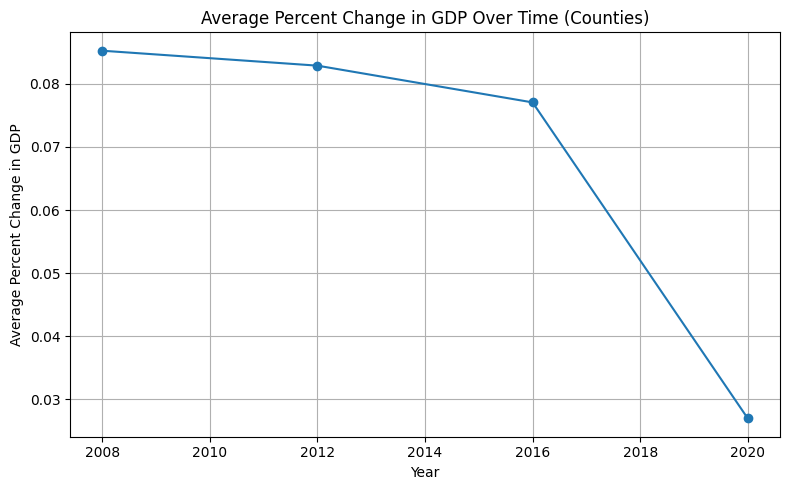

In [85]:
# First Visual - GDP change over time
avg_gdp = final_data.groupby("YEAR")["pct_change_gdp"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_gdp["YEAR"], avg_gdp["pct_change_gdp"], marker="o")
plt.title("Average Percent Change in GDP Over Time (Counties)")
plt.xlabel("Year")
plt.ylabel("Average Percent Change in GDP")
plt.grid(True)
plt.tight_layout()
plt.show()

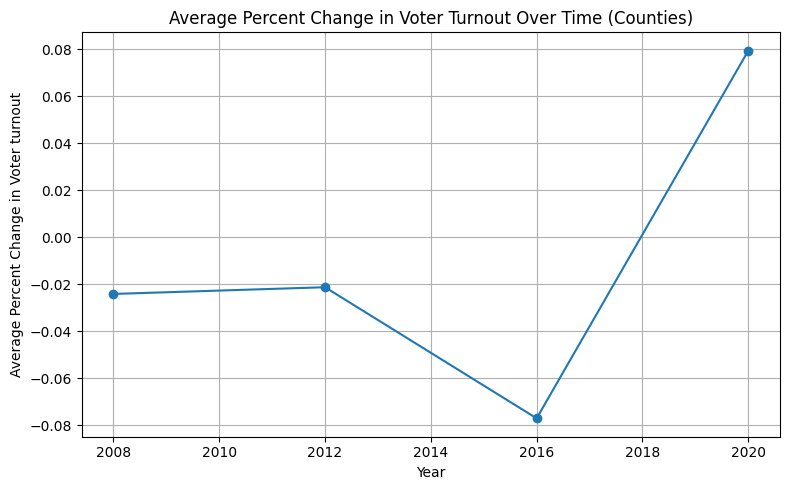

In [86]:
# Visual two - % change in voter turnout pct over time
avg_turnout = final_data.groupby("YEAR")["pct_change_turnout"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_turnout["YEAR"], avg_turnout["pct_change_turnout"], marker="o")
plt.title("Average Percent Change in Voter Turnout Over Time (Counties)")
plt.xlabel("Year")
plt.ylabel("Average Percent Change in Voter turnout")
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# Run my regression, using unemployment + years as predictors
# Looked up and used AI for incorporating indiidual year data
year_data = pd.get_dummies(final_data, columns=["YEAR"], drop_first=True)

model3 = smf.ols("pct_change_turnout ~ pct_change_gdp + unemployment_rate + YEAR_2012 + YEAR_2016 + YEAR_2020",data=year_data).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:     pct_change_turnout   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     62.00
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           5.13e-64
Time:                        00:55:56   Log-Likelihood:                -4279.1
No. Observations:               11654   AIC:                             8570.
Df Residuals:                   11648   BIC:                             8614.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0553      0.01

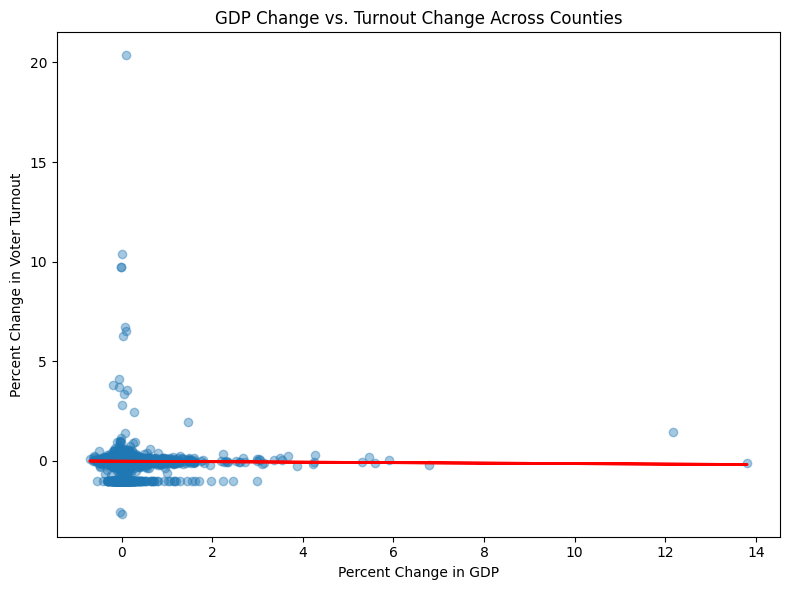

In [88]:
# Scatterplot of the regression for 2nd slide
x = final_data["pct_change_gdp"]
y = final_data["pct_change_turnout"]

# remove NA
x_clean = x.dropna()
y_clean = y.dropna()

# regression line
m, b = np.polyfit(x_clean, y_clean, 1)

plt.figure(figsize=(8,6))
plt.scatter(x_clean, y_clean, alpha=0.4)

# regression line
plt.plot(x_clean, m*x_clean + b, color="red", linewidth=2)

plt.title("GDP Change vs. Turnout Change Across Counties")
plt.xlabel("Percent Change in GDP")
plt.ylabel("Percent Change in Voter Turnout")
plt.tight_layout()
plt.show()